In [6]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 

In [81]:
train = pd.read_excel('DST_BIL54_train.xlsx', index_col=0).T

In [82]:
Y = train['Drivmidler i alt']

In [64]:
X = np.arange(2018, 2018 + len(Y)/12 -1/12,  1/12)

In [65]:
len(X)

59

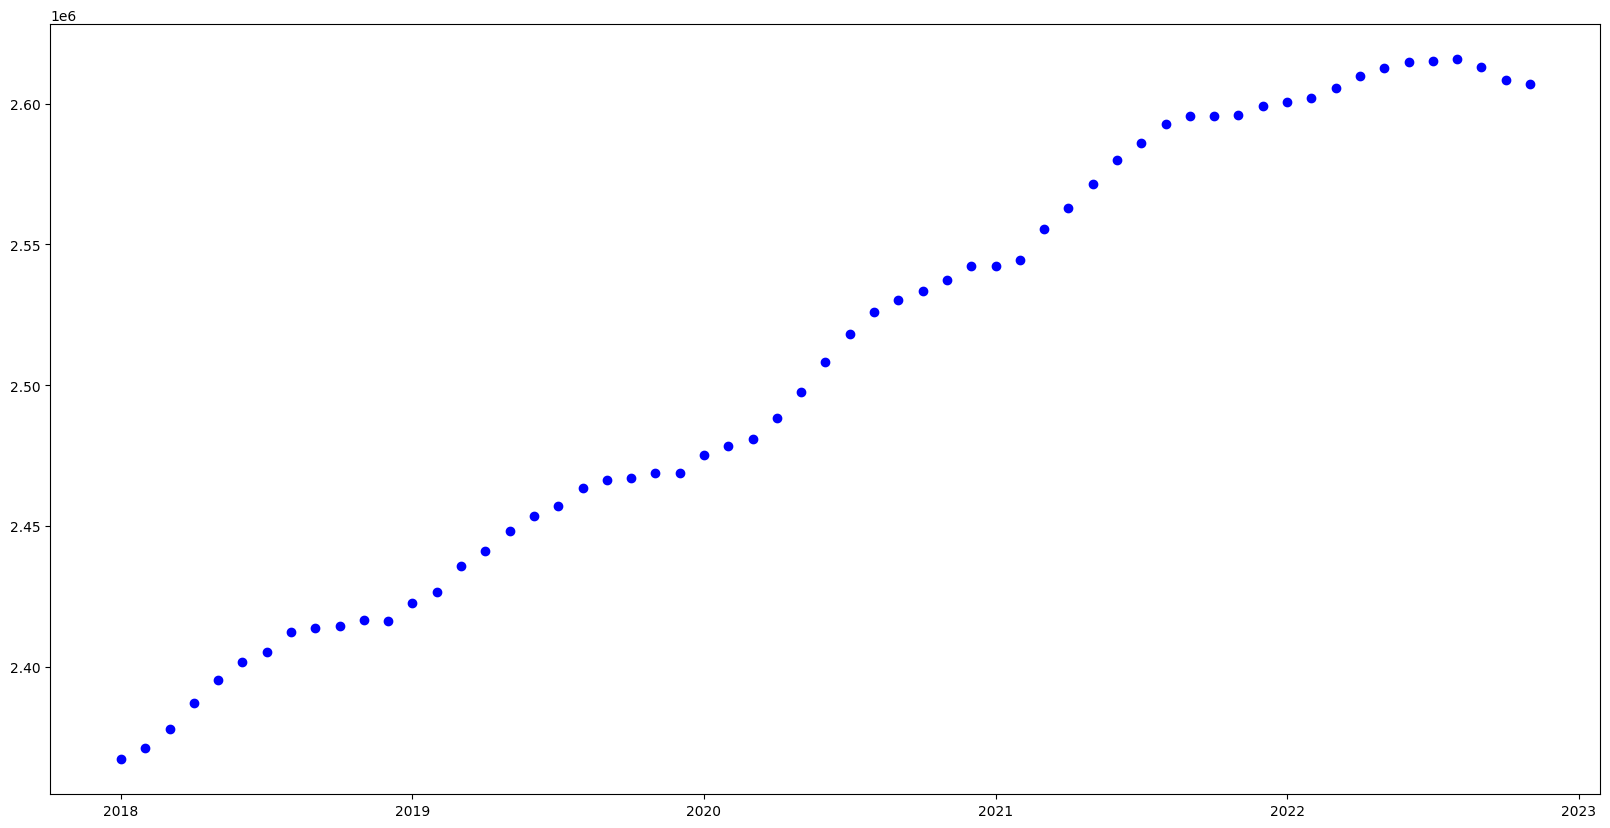

In [66]:
plt.plot(X, Y, 'bo')

In [68]:
x = X

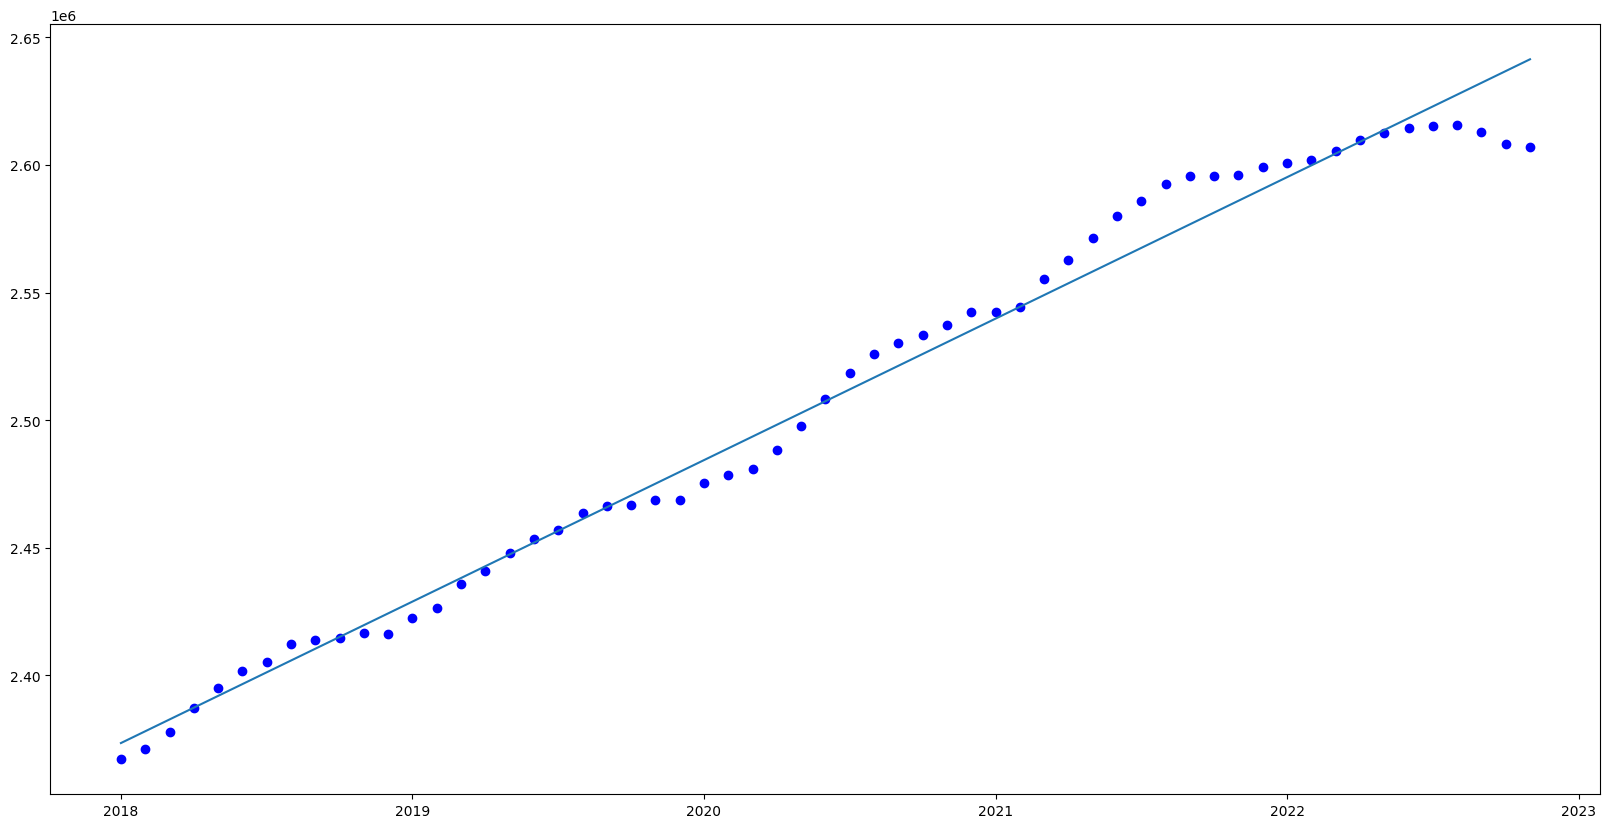

In [74]:
plt.plot(x, Y, 'bo')
plt.plot(x, X @ Theta, '-')




In [70]:
# getting column 
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

In [71]:
X = np.hstack((np.ones((len(X),1)), X))

In [72]:
Theta = np.linalg.inv(X.T @ X) @ X.T @ Y

In [73]:
Theta

array([[-1.09499933e+08],
       [ 5.54377830e+04]])

In [49]:
e = Y - X @ Theta

In [50]:
e2 = e.T @ e

In [52]:
var = e2 / (len(Y)-2)

In [53]:
var 

array([[1.07475954e+08]])

In [54]:
Y.mean()

2507488.0169491526

In [55]:
Var_theta = np.linalg.inv(X.T @ X) * var

In [57]:
se_theta_0 = np.sqrt(Var_theta[0,0])
se_theta_1 = np.sqrt(Var_theta[1,1])

In [59]:
se_theta_0, se_theta_1

(1921555.5510309245, 951.0687120806942)

In [76]:
# 3 

next_12 = np.arange(1/12, 1 + 1/12, 1/12)

In [77]:
next_12

array([0.08333333, 0.16666667, 0.25      , 0.33333333, 0.41666667,
       0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
       0.91666667, 1.        ])

In [90]:
# adding the begginging of time
next_12 = next_12 + X[-1][1]

In [99]:
X12 = np.hstack((np.ones(12).reshape(-1,1), next_12.reshape(-1,1)))

In [100]:
X12 @ Theta

array([[2646082.47416377],
       [2650702.28941065],
       [2655322.10465752],
       [2659941.9199044 ],
       [2664561.73515128],
       [2669181.55039814],
       [2673801.36564502],
       [2678421.1808919 ],
       [2683040.99613878],
       [2687660.81138565],
       [2692280.62663253],
       [2696900.44187941]])

In [96]:
# get t-student value 
from scipy.stats import t

alpha = 0.1


t_value = t.ppf(alpha/2, len(Y)-2) # this is negative but t-student is symmetric 
# -1.9431802803927818

In [97]:
t.ppf(alpha/2, 7-2) 

-2.0150483726691575

In [115]:
X12

array([[1.00000000e+00, 2.02291667e+03],
       [1.00000000e+00, 2.02300000e+03],
       [1.00000000e+00, 2.02308333e+03],
       [1.00000000e+00, 2.02316667e+03],
       [1.00000000e+00, 2.02325000e+03],
       [1.00000000e+00, 2.02333333e+03],
       [1.00000000e+00, 2.02341667e+03],
       [1.00000000e+00, 2.02350000e+03],
       [1.00000000e+00, 2.02358333e+03],
       [1.00000000e+00, 2.02366667e+03],
       [1.00000000e+00, 2.02375000e+03],
       [1.00000000e+00, 2.02383333e+03]])

In [113]:
X12.T @ np.linalg.inv(X.T @ X) @ X12

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 12)

In [ ]:
(1 +  X12 @ np.linalg.inv(X.T @ X) @ X12.T)

In [119]:
v_es = var *  (1 +  X12 @ np.linalg.inv(X.T @ X) @ X12.T)

In [127]:
confidence =  t_value *  np.sqrt(v_es.diagonal())

In [136]:
X12 @ Theta - confidence.reshape(-1,1),  X12 @ Theta + confidence.reshape(-1,1)

(array([[2664009.15846537],
        [2668658.82666261],
        [2673309.4216359 ],
        [2677960.93863599],
        [2682613.37280513],
        [2687266.71918062],
        [2691920.97269827],
        [2696576.12819575],
        [2701232.1804162 ],
        [2705889.1240117 ],
        [2710546.9535468 ],
        [2715205.66350204]]),
 array([[2628155.78986218],
        [2632745.75215869],
        [2637334.78767913],
        [2641922.90117281],
        [2646510.09749742],
        [2651096.38161566],
        [2655681.75859177],
        [2660266.23358805],
        [2664849.81186136],
        [2669432.4987596 ],
        [2674014.29971825],
        [2678595.22025677]]))

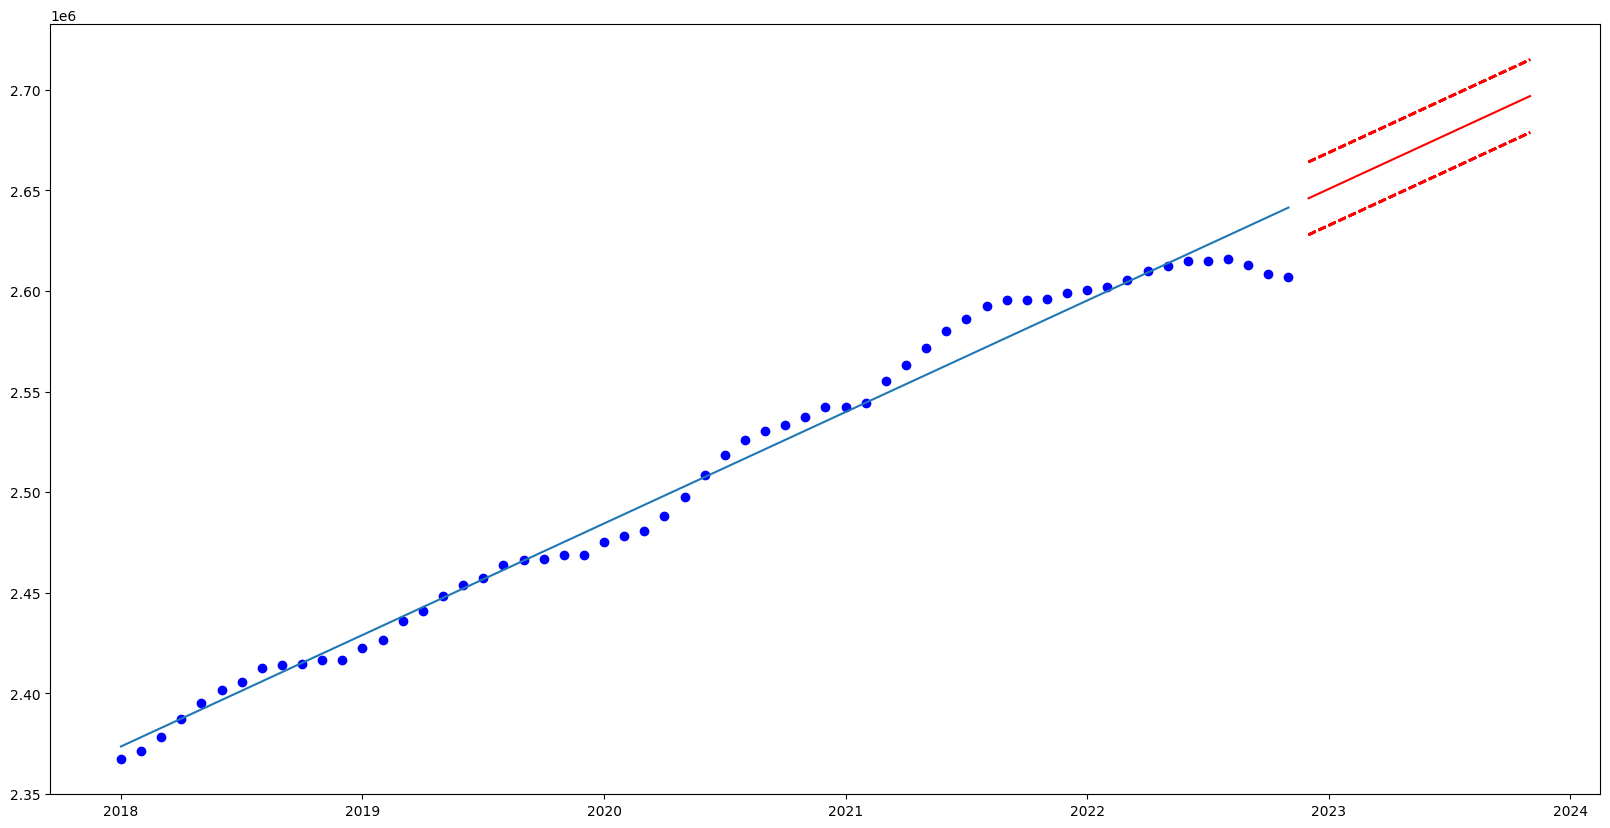

In [138]:
# plot me data with confidence intervals 
plt.plot(x, Y, 'bo')
plt.plot(x, X @ Theta, '-')

plt.plot(X12[:,1], X12 @ Theta, 'r-')
plt.plot(X12[:,1], X12 @ Theta - confidence, 'r--')
plt.plot(X12[:,1], X12 @ Theta + confidence, 'r--')
